In [1]:
# ==============================
# 1. IMPORTAR LIBRERÍAS
# ==============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#CARGAR DF
df = pd.read_csv('df_processed_final.csv')

#imprimir columnas
df.columns


Index(['Genero', 'Campesino', 'Estrato', 'NIvel_educacion', 'Discapacidad',
       'Tipo_formacion', 'Victima_del_conflicto', 'tiempo_segundos',
       'Puntaje_eje_tematico_selecionado', 'area_1_alfabetizacion_datos',
       'area_2_comunicacion_y_colaboracion', 'area_3_contenidos_digitales',
       'area_4_seguridad', 'area_5_solucion_de_problemas', 'area_6_igles',
       'Asistencia horas', 'Total_horas posibles', 'etnica_Indígena',
       'etnica_Negro, Mulato, Afrodescendiente, Afrocolombiano',
       'etnica_Ningún grupo étnico',
       'etnica_Raizal del Archipiélago de San Andrés, Providencia y Santa Catalina',
       'etnica_Rrom o gitano', 'linea_1_Explorador - Básico',
       'linea_1_Innovador - Avanzado', 'linea_1_Integrador - Intermedio',
       'linea_2_Explorador - Básico', 'linea_2_Innovador - Avanzado',
       'linea_2_Integrador - Intermedio', 'linea_3_Explorador - Básico',
       'linea_3_Innovador - Avanzado', 'linea_3_Integrador - Intermedio',
       'linea_4_Expl

In [3]:
print(f"Dataset cargado: {df.shape}")

Dataset cargado: (1643, 95)


In [4]:
# Variable objetivo
y = df["exito_academico"]
# Features (todas excepto la target)
X = df.drop(columns=[
    'exito_academico',
    'Asistencia horas',
    'Cohorte_1', 'Cohorte_2', 'Cohorte_3', 'Cohorte_4',
    'Cohorte_5', 'Cohorte_6', 'Cohorte_7', 'Cohorte_8',
    'Cohorte_2_3', 'Cohorte_3_5', 'Cohorte_4_5', 'Cohorte_5_7',
    'Cohorte_6_7', 'Cohorte_6_8',
    'dia', 'mes', 'year',
    'Tipo_de_formacion_Híbrida',

    # Variables de áreas (redundantes por promedio_areas)
    'area_1_alfabetizacion_datos',
    'area_2_comunicacion_y_colaboracion',
    'area_3_contenidos_digitales',
    'area_4_seguridad',
    'area_5_solucion_de_problemas',
    'area_6_igles',

    # Variables categóricas nivel Explorador / Innovador / Integrador
    'area_1_Explorador', 'area_1_Innovador', 'area_1_Integrador',
    'area_2_Explorador', 'area_2_Innovador', 'area_2_Integrador',
    'area_3_Explorador', 'area_3_Innovador', 'area_3_Integrador',
    'area_4_Explorador', 'area_4_Innovador', 'area_4_Integrador',
    'area_5_Explorador', 'area_5_Innovador', 'area_5_Integrador',
    
     # Eje programa (duplicado de eje final)
    'Programa_de_Formación_Arquitectura en la nube',
    'Programa_de_Formación_Blockchain',
    'Programa_de_Formación_Inteligencia artificial',
    'Programa_de_Formación_Programación',
    
    #evitar multicol
    'eje_final_Blockchain', 'Nivel_Intermedio', 'etnica_Raizal del Archipiélago de San Andrés, Providencia y Santa Catalina',
    
    'eje_tematico_Blockchain',
    'eje_tematico_Ciber seguridad y Blockchain',
    'eje_tematico_Computación y arquitectura en la nube',
    'eje_tematico_Datos', 'eje_tematico_Inteligencia artificial',
    'eje_tematico_Programación', 'Programa_de_Formación_Análisis de datos',
    
    'linea_2_Explorador - Básico', 'linea_4_Explorador - Básico', 'linea_3_Innovador - Avanzado', 'linea_2_Innovador - Avanzado',
    'linea_4_Innovador - Avanzado', 'linea_4_Integrador - Intermedio', 'ratio_asistencia',  'ratio_asistencia', 'linea_pca','Total_horas posibles'
    
])


In [5]:
y.value_counts(normalize=True)

exito_academico
1    0.550213
0    0.449787
Name: proportion, dtype: float64

In [6]:
X.columns

Index(['Genero', 'Campesino', 'Estrato', 'NIvel_educacion', 'Discapacidad',
       'Tipo_formacion', 'Victima_del_conflicto', 'tiempo_segundos',
       'Puntaje_eje_tematico_selecionado', 'etnica_Indígena',
       'etnica_Negro, Mulato, Afrodescendiente, Afrocolombiano',
       'etnica_Ningún grupo étnico', 'etnica_Rrom o gitano',
       'linea_1_Explorador - Básico', 'linea_1_Innovador - Avanzado',
       'linea_1_Integrador - Intermedio', 'linea_2_Integrador - Intermedio',
       'linea_3_Explorador - Básico', 'linea_3_Integrador - Intermedio',
       'linea_5_Explorador - Básico', 'linea_5_Innovador - Avanzado',
       'linea_5_Integrador - Intermedio', 'eje_final_Análisis de Datos',
       'eje_final_Arquitectura en la nube',
       'eje_final_Inteligencia artificial', 'eje_final_Programación',
       'Nivel_Avanzado', 'Nivel_Básico', 'Tipo_de_formacion_Virtual',
       'promedio_lineas', 'promedio_areas'],
      dtype='object')


=== CORRELACIONES DE PEARSON ===


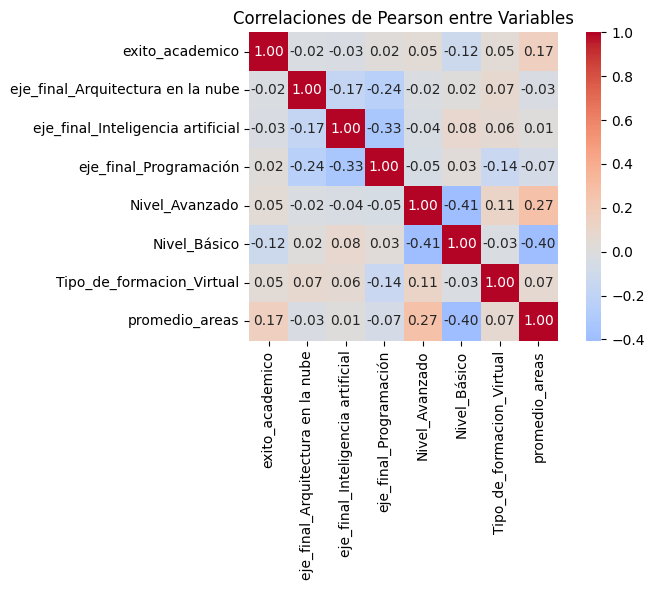

Matriz de correlación de Pearson generada


In [7]:
# Correlaciones (Pearson)
print("\n=== CORRELACIONES DE PEARSON ===")

# Variables importantes para correlacionar
vars_corr = ['exito_academico','eje_final_Arquitectura en la nube',
       'eje_final_Inteligencia artificial', 'eje_final_Programación',
       'Nivel_Avanzado', 'Nivel_Básico', 'Tipo_de_formacion_Virtual',
        'promedio_areas']

vars_disponibles = [v for v in vars_corr if v in df.columns]

if len(vars_disponibles) >= 3:
    corr_matrix = df[vars_disponibles].corr(method='pearson')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
               square=True, fmt='.2f')
    plt.title('Correlaciones de Pearson entre Variables')
    plt.tight_layout()
    plt.show()
    print("Matriz de correlación de Pearson generada")




In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
nan_rows_train = X_train[X_train.isna().any(axis=1)]
print(nan_rows_train)


Empty DataFrame
Columns: [Genero, Campesino, Estrato, NIvel_educacion, Discapacidad, Tipo_formacion, Victima_del_conflicto, tiempo_segundos, Puntaje_eje_tematico_selecionado, etnica_Indígena, etnica_Negro, Mulato, Afrodescendiente, Afrocolombiano, etnica_Ningún grupo étnico, etnica_Rrom o gitano, linea_1_Explorador - Básico, linea_1_Innovador - Avanzado, linea_1_Integrador - Intermedio, linea_2_Integrador - Intermedio, linea_3_Explorador - Básico, linea_3_Integrador - Intermedio, linea_5_Explorador - Básico, linea_5_Innovador - Avanzado, linea_5_Integrador - Intermedio, eje_final_Análisis de Datos, eje_final_Arquitectura en la nube, eje_final_Inteligencia artificial, eje_final_Programación, Nivel_Avanzado, Nivel_Básico, Tipo_de_formacion_Virtual, promedio_lineas, promedio_areas]
Index: []

[0 rows x 31 columns]


In [10]:
print(df['exito_academico'].value_counts(normalize=True))


exito_academico
1    0.550213
0    0.449787
Name: proportion, dtype: float64


In [11]:
# Conteo de NaN por columna
nan_count = X_train.isna().sum()

# Porcentaje de NaN por columna
nan_percent = (X_train.isna().mean() * 100).round(2)

# Unir todo en un solo dataframe bonito
nan_report = pd.DataFrame({
    'NaN Count': nan_count,
    'NaN %': nan_percent
})

# Mostrar solo columnas que sí tienen NaN
nan_report[nan_report['NaN Count'] > 0].sort_values('NaN %', ascending=False)


,NaN Count,NaN %


In [12]:

X_train[X_train.isna().any(axis=1)].head()

,Genero,Campesino,Estrato,NIvel_educacion,Discapacidad,Tipo_formacion,Victima_del_conflicto,tiempo_segundos,Puntaje_eje_tematico_selecionado,etnica_Indígena,...,linea_5_Integrador - Intermedio,eje_final_Análisis de Datos,eje_final_Arquitectura en la nube,eje_final_Inteligencia artificial,eje_final_Programación,Nivel_Avanzado,Nivel_Básico,Tipo_de_formacion_Virtual,promedio_lineas,promedio_areas


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)


# Logistic regression

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import pandas as pd

# Imputador
imputer = SimpleImputer(strategy='mean')  # reemplaza NaN por la media

# Hiperparámetros
C_values = [0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']
max_iters = [100, 500, 1000]
class_weights = [None, 'balanced']     # nuevo
k_values = [10, 15, 20, 25, 30]        # para SelectKBest

solver_map = {'l1': 'saga', 'l2': 'lbfgs'}

results = []

for k in k_values:
    # SelectKBest para este k
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)

    for penalty in penalties:
        for C in C_values:
            for max_iter in max_iters:
                for cw in class_weights:

                    log_reg = LogisticRegression(
                        penalty=penalty,
                        C=C,
                        solver=solver_map[penalty],
                        max_iter=max_iter,
                        class_weight=cw,
                        n_jobs=-1
                    )

                    log_reg.fit(X_train_sel, y_train)
                    y_pred = log_reg.predict(X_test_sel)
                    y_prob = log_reg.predict_proba(X_test_sel)[:, 1]

                    auc = roc_auc_score(y_test, y_prob)
                    acc = accuracy_score(y_test, y_pred)
                    cm = confusion_matrix(y_test, y_pred)

                    results.append({
                        'k': k,
                        'penalty': penalty,
                        'C': C,
                        'max_iter': max_iter,
                        'class_weight': cw,
                        'accuracy': acc,
                        'auc': auc,
                        'confusion_matrix': cm
                    })


# Convertir a DataFrame y ordenar por AUC
results_df = pd.DataFrame(results).sort_values(by='accuracy', ascending=False)
print(results_df)


f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_i

      k penalty      C  max_iter class_weight  accuracy       auc  \
258  30      l1  10.00       100         None  0.628803  0.632226   
130  20      l1   0.10      1000         None  0.628803  0.624954   
128  20      l1   0.10       500         None  0.628803  0.624971   
30   10      l2   0.01       100         None  0.628803  0.626542   
34   10      l2   0.01      1000         None  0.628803  0.626542   
..   ..     ...    ...       ...          ...       ...       ...   
65   15      l1   0.01      1000     balanced  0.582150  0.614017   
241  30      l1   0.01       100     balanced  0.582150  0.614017   
245  30      l1   0.01      1000     balanced  0.582150  0.614017   
243  30      l1   0.01       500     balanced  0.582150  0.614017   
1    10      l1   0.01       100     balanced  0.582150  0.614017   

            confusion_matrix  
258   [[98, 124], [59, 212]]  
130   [[70, 152], [31, 240]]  
128   [[70, 152], [31, 240]]  
30    [[71, 151], [32, 239]]  
34    [[71, 151]

In [15]:
# ============================================
#  ENTRENAR LA MEJOR LogisticRegression Y EXPORTARLA
# ============================================

import joblib
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# 1. Obtener la mejor combinación encontrada
best_lr = results_df.iloc[0]
print("Mejor configuración encontrada (LogisticRegression):")
print(best_lr)

best_k = int(best_lr["k"])
best_penalty = best_lr["penalty"]
best_C = float(best_lr["C"])
best_max_iter = int(best_lr["max_iter"])
best_class_weight = best_lr["class_weight"]  # puede ser None o 'balanced'

solver_map = {'l1': 'saga', 'l2': 'lbfgs'}
best_solver = solver_map[best_penalty]

# 2. Volver a aplicar SelectKBest con el mejor k encontrado
best_selector_lr = SelectKBest(score_func=f_classif, k=best_k)
X_train_best_lr = best_selector_lr.fit_transform(X_train, y_train)
X_test_best_lr = best_selector_lr.transform(X_test)

# 3. Entrenar el modelo final con TODOS los datos de entrenamiento
best_log_reg = LogisticRegression(
    penalty=best_penalty,
    C=best_C,
    solver=best_solver,
    max_iter=best_max_iter,
    class_weight=best_class_weight,
    n_jobs=-1
)

best_log_reg.fit(X_train_best_lr, y_train)

# 4. Evaluar sobre test para mostrar resultado final
y_pred_best_lr = best_log_reg.predict(X_test_best_lr)
y_prob_best_lr = best_log_reg.predict_proba(X_test_best_lr)[:, 1]

final_acc_lr = accuracy_score(y_test, y_pred_best_lr)
final_auc_lr = roc_auc_score(y_test, y_prob_best_lr)
cm_lr = confusion_matrix(y_test, y_pred_best_lr)

print("=====================================")
print("RESULTADO FINAL DEL MEJOR MODELO LR")
print("Accuracy:", final_acc_lr)
print("AUC:", final_auc_lr)
print("Matriz de confusión:\n", cm_lr)
print("=====================================")

# 5. Guardar artefactos para deploy
joblib.dump(best_log_reg, "modelo_logistic_regression_final.pkl")
joblib.dump(best_selector_lr, "selector_kbest_lr.pkl")
joblib.dump(X.columns.tolist(), "columnas_originales_lr.pkl")

print("Modelo LR, selector y columnas exportados correctamente.")


Mejor configuración encontrada (LogisticRegression):
k                                       30
penalty                                 l1
C                                     10.0
max_iter                               100
class_weight                          None
accuracy                          0.628803
auc                               0.632226
confusion_matrix    [[98, 124], [59, 212]]
Name: 258, dtype: object
RESULTADO FINAL DEL MEJOR MODELO LR
Accuracy: 0.6288032454361054
AUC: 0.6320933479605066
Matriz de confusión:
 [[ 98 124]
 [ 59 212]]
Modelo LR, selector y columnas exportados correctamente.


f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputación (opcional, si hay NaN)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_sel)
X_test_imputed = imputer.transform(X_test_sel)

# Hiperparámetros a probar
n_estimators_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]          # número de árboles
max_depth_list = [None, 5, 10, 20]           # profundidad máxima
min_samples_split_list = [2, 5, 10]          # min samples para dividir
min_samples_leaf_list = [1, 2, 4]            # min samples por hoja
max_features_list = ['sqrt', 'log2', None]   # max features to consider
bootstrap_list = [True, False]               # bootstrap or not

results_rf = []

for k in k_values:
    # Aplicar SelectKBest para este valor de k
    selector = SelectKBest(f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)

    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            for min_samples_split in min_samples_split_list:
                for min_samples_leaf in min_samples_leaf_list:
                    for max_features in max_features_list:
                        for bootstrap in bootstrap_list:

                            rf = RandomForestClassifier(
                                n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                bootstrap=bootstrap,
                                class_weight='balanced',
                                random_state=42,
                                n_jobs=-1
                            )

                            rf.fit(X_train_sel, y_train)
                            y_pred = rf.predict(X_test_sel)
                            y_prob = rf.predict_proba(X_test_sel)[:, 1]

                            acc = accuracy_score(y_test, y_pred)
                            auc = roc_auc_score(y_test, y_prob)
                            cm = confusion_matrix(y_test, y_pred)

                            results_rf.append({
                                'k': k,
                                'n_estimators': n_estimators,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features,
                                'bootstrap': bootstrap,
                                'accuracy': acc,
                                'auc': auc,
                                'confusion_matrix': cm
                            })


# Convertir a DataFrame y ordenar por AUC
results_rf_df = pd.DataFrame(results_rf).sort_values(by='accuracy', ascending=False)
print(results_rf_df)


       k  n_estimators  max_depth  min_samples_split  min_samples_leaf  \
9346  30           400        5.0                  2                 1   
8962  30           200        5.0                 10                 4   
9592  30           500        5.0                  5                 4   
8944  30           200        5.0                  5                 4   
8926  30           200        5.0                  2                 4   
...   ..           ...        ...                ...               ...   
6293  20          1000        NaN                  5                 2   
5429  20           600        NaN                  5                 2   
5861  20           800        NaN                  5                 2   
5645  20           700        NaN                  5                 2   
4997  20           400        NaN                  5                 2   

     max_features  bootstrap  accuracy       auc          confusion_matrix  
9346         None       True  0.63

In [118]:
# ============================================
#  ENTRENAR EL MEJOR RandomForest Y EXPORTARLO
# ============================================

import joblib
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# 1. Obtener la mejor combinación encontrada
best = results_rf_df.iloc[0]
print("Mejor configuración encontrada:")
print(best)

best_k = int(best["k"])
best_n_estimators = int(best["n_estimators"])
best_max_depth = None if pd.isna(best["max_depth"]) else int(best["max_depth"])
best_min_samples_split = int(best["min_samples_split"])
best_min_samples_leaf = int(best["min_samples_leaf"])
best_max_features = None if best["max_features"] == "None" else best["max_features"]
best_bootstrap = bool(best["bootstrap"])

# 2. Volver a aplicar SelectKBest con el mejor k encontrado
best_selector = SelectKBest(score_func=f_classif, k=best_k)
X_train_best = best_selector.fit_transform(X_train, y_train)
X_test_best = best_selector.transform(X_test)

# 3. Entrenar el modelo final con TODOS los datos de entrenamiento
best_rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    max_features=best_max_features,
    bootstrap=best_bootstrap,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_best, y_train)

# 4. Evaluar sobre test para mostrar resultado final
y_pred_best = best_rf.predict(X_test_best)
y_prob_best = best_rf.predict_proba(X_test_best)[:, 1]

final_acc = accuracy_score(y_test, y_pred_best)
final_auc = roc_auc_score(y_test, y_prob_best)

print("=====================================")
print("RESULTADO FINAL DEL MEJOR MODELO RF")
print("Accuracy:", final_acc)
print("AUC:", final_auc)
print("=====================================")

# 5. Guardar artefactos para deploy
joblib.dump(best_rf, "modelo_random_forest_final.pkl")
joblib.dump(best_selector, "selector_kbest.pkl")
joblib.dump(X.columns.tolist(), "columnas_originales.pkl")

print("Modelo, selector y columnas exportados correctamente.")


Mejor configuración encontrada:
k                                         30
n_estimators                             400
max_depth                                5.0
min_samples_split                          2
min_samples_leaf                           1
max_features                            None
bootstrap                               True
accuracy                            0.636917
auc                                  0.64707
confusion_matrix     [[118, 104], [75, 196]]
Name: 9346, dtype: object
RESULTADO FINAL DEL MEJOR MODELO RF
Accuracy: 0.6369168356997972
AUC: 0.647069578803896
Modelo, selector y columnas exportados correctamente.


# XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputación opcional si hay NaN
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_sel)
X_test_imputed = imputer.transform(X_test_sel)

k_values = [10, 15, 20, 25, 30]        # para SelectKBest  

# Hiperparámetros a probar
n_estimators_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]          
max_depth_list = [3, 5, 7, 10]
learning_rate_list = [0.01, 0.03, 0.05, 0.1]
subsample_list = [0.8, 1.0]
colsample_bytree_list = [0.8, 1.0]    
gamma_list = [0, 0.5, 1]              

results_xgb = []

for k in k_values:
    # SelectKBest para este k
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)

    for n_estimators in n_estimators_list:
        for max_depth in max_depth_list:
            for lr in learning_rate_list:
                for subsample in subsample_list:
                    for colsample_bytree in colsample_bytree_list:
                        for gamma in gamma_list:

                            model = xgb.XGBClassifier(
                                n_estimators=n_estimators,
                                max_depth=max_depth,
                                learning_rate=lr,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree,
                                gamma=gamma,
                                use_label_encoder=False,
                                eval_metric='logloss',
                                random_state=42,
                                n_jobs=-1
                            )

                            model.fit(X_train_sel, y_train)

                            y_pred = model.predict(X_test_sel)
                            y_prob = model.predict_proba(X_test_sel)[:, 1]

                            auc = roc_auc_score(y_test, y_prob)
                            acc = accuracy_score(y_test, y_pred)
                            cm = confusion_matrix(y_test, y_pred)

                            results_xgb.append({
                                'k': k,
                                'n_estimators': n_estimators,
                                'max_depth': max_depth,
                                'learning_rate': lr,
                                'subsample': subsample,
                                'colsample_bytree': colsample_bytree,
                                'gamma': gamma,
                                'accuracy': acc,
                                'auc': auc,
                                'confusion_matrix': cm
                            })

# Convertir a DataFrame y ordenar por AUC
results_xgb_df = pd.DataFrame(results_xgb).sort_values(by='accuracy', ascending=False)
print(results_xgb_df)


f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:16:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:16:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
f:\ANDRES\JAVERIANA ANDRES\7 Semestre Sistemas\Machine Learning\Proyecto\Proyecto_Machine_Learning\proyectoMachine\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:16:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  b

In [ ]:
# ============================================
#  ENTRENAR EL MEJOR XGBoost Y EXPORTARLO
# ============================================

import joblib
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# 1. Obtener la mejor combinación encontrada
best_xgb = results_xgb_df.iloc[0]
print("Mejor configuración encontrada (XGBoost):")
print(best_xgb)

best_k = int(best_xgb["k"])
best_n_estimators = int(best_xgb["n_estimators"])
best_max_depth = int(best_xgb["max_depth"])
best_lr = float(best_xgb["learning_rate"])
best_subsample = float(best_xgb["subsample"])
best_colsample_bytree = float(best_xgb["colsample_bytree"])
best_gamma = float(best_xgb["gamma"])

# 2. Volver a aplicar SelectKBest con el mejor k encontrado
best_selector_xgb = SelectKBest(score_func=f_classif, k=best_k)
X_train_best_xgb = best_selector_xgb.fit_transform(X_train, y_train)
X_test_best_xgb = best_selector_xgb.transform(X_test)

# 3. Entrenar el modelo final con TODOS los datos de entrenamiento
best_xgb_model = XGBClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    learning_rate=best_lr,
    subsample=best_subsample,
    colsample_bytree=best_colsample_bytree,
    gamma=best_gamma,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

best_xgb_model.fit(X_train_best_xgb, y_train)

# 4. Evaluar sobre test para mostrar resultado final
y_pred_best_xgb = best_xgb_model.predict(X_test_best_xgb)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test_best_xgb)[:, 1]

final_acc_xgb = accuracy_score(y_test, y_pred_best_xgb)
final_auc_xgb = roc_auc_score(y_test, y_prob_best_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)

print("=====================================")
print("RESULTADO FINAL DEL MEJOR MODELO XGBoost")
print("Accuracy:", final_acc_xgb)
print("AUC:", final_auc_xgb)
print("Matriz de confusión:\n", cm_xgb)
print("=====================================")

# 5. Guardar artefactos para deploy
joblib.dump(best_xgb_model, "modelo_xgboost_final.pkl")
joblib.dump(best_selector_xgb, "selector_kbest_xgb.pkl")
joblib.dump(X.columns.tolist(), "columnas_originales_xgb.pkl")

print("Modelo XGBoost, selector y columnas exportados correctamente.")
